# AVOCADO DATASET

    Avocado is a fruit consumed by people heavily in the United States. 

## Content

    This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.
    The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

## Inspiration /Label

    The dataset can be seen in two angles to find the city or region and find the average price .

## Task

    Both Regression and Classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.0,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.0,conventional,2016.0,Charlotte
1516,14.0,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.0,conventional,2016.0,Charlotte
1517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Unwanted rows
df.drop([1517,1518],axis=0,inplace=True)

In [4]:
# Unwanted index
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


## Columns Description:

    -Date - The date of the observation
    -AveragePrice - the average price of a single avocado
    -Total Volume - Total number of avocados sold
    -4046 - Total number of avocados with PLU 4046 sold (Product Lookup codes (PLU’s)
    -4225 - Total number of avocados with PLU 4225 sold (Product Lookup codes (PLU’s) 
    -4770 - Total number of avocados with PLU 4770 sold (Product Lookup codes (PLU’s)
    -Type - conventional or organic
    -Year - the year
    -Region - the city or region of the observation    

# EDA

In [6]:
df.shape

(1517, 13)

In [7]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


### Observations:
    Columns such as Date, type, region are in object data-types.
    Rest of the columns are in float data-types.

In [9]:
# converting date column into 'date-time' format
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   float64       
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 165.9+ KB


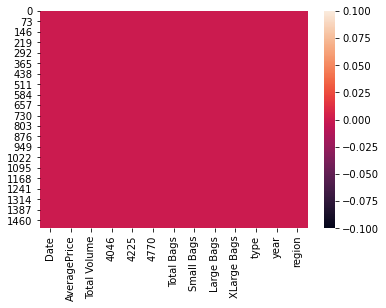

In [11]:
sns.heatmap(df.isnull())
plt.show()

### Observations:
    No missing values in the dataset.

## Univariate Analysis.

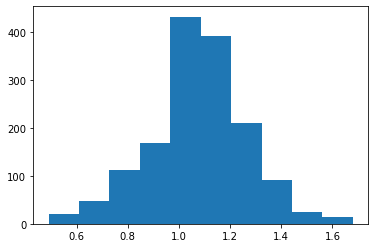

In [12]:
plt.hist(df['AveragePrice'])
plt.show()

### Observations:
    Average price of a Avocado is 1 to 1.2 US Dollar across regions in United States.

In [13]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

### Observations:
    These are the city/regions of observations. 

In [14]:
df['year'].unique()

array([2015., 2016.])

### Observations:
    These data are from years 2015 and 2016.

In [15]:
df['type'].unique()

array(['conventional'], dtype=object)

### Observations:
    All Avocados are of conventional type.

In [16]:
print('XLarge Bags:',df['XLarge Bags'].mean())
print('Large Bags:',df['Large Bags'].mean())
print('Small Bags:',df['Small Bags'].mean())

XLarge Bags: 2181.7710744891233
Large Bags: 42642.049373764
Small Bags: 248773.59528675006


### Observations:
    On average, 2181 XLarge bags of Avocados are sold across regions of United States
    On average, 42642 Large bags of Avocados are sold across regions of United States.
    On average, 248773 Small bags of Avocados are sold across regions of United States.

### Conclusion:
        Small bags of Avocados are sold more in numbers across regions of US.

In [17]:
print('4046:-',df['4046'].mean())
print('4225:-',df['4225'].mean())
print('4770:-',df['4770'].mean())

4046:- 646438.6541133816
4225:- 611437.5025906389
4770:- 50405.495398813444


### Observations:
    On average, 'Avocados with PLU 4046' are sold more in numbers across regions of US.    

## Bivariate Analysis

### 1. Target Variable = Average Price

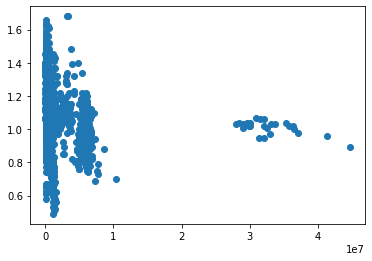

In [18]:
plt.scatter(df['Total Volume'],df['AveragePrice'])
plt.show()

### Observations:
        As Total volume increases Average price of Avocados decreases.

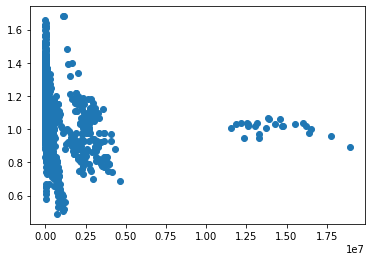

In [19]:
plt.scatter(df['4046'],df['AveragePrice'])
plt.show()

### Observations:
        Average price of a 'Avocado with PLU 4046' is 0.6 to 1.2 US Dollar.

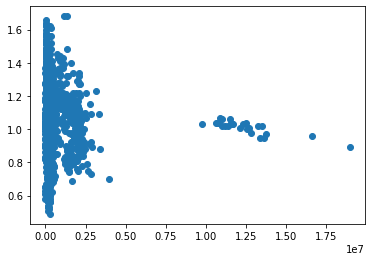

In [20]:
plt.scatter(df['4225'],df['AveragePrice'])
plt.show()

### Observations:
        Average price of a 'Avocado with PLU 4225' is 0.8 to 1.4 US Dollar.

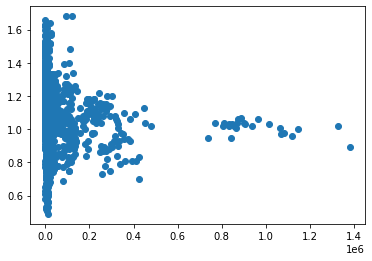

In [93]:
plt.scatter(df['4770'],df['AveragePrice'])
plt.show()

### Observations:
        Average price of a 'Avocado with PLU 4770' is 0.8 to 1.4 US Dollar.

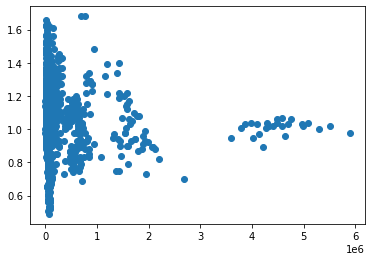

In [22]:
plt.scatter(df['Small Bags'],df['AveragePrice'])
plt.show()

### Observations:
        Average price of a Avocado in 'Small Bag' is 0.8 to 1.4 US Dollar.

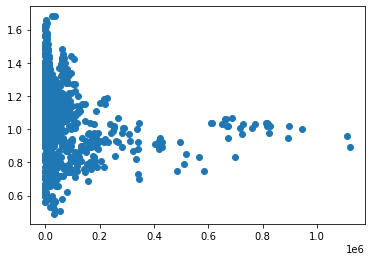

In [23]:
plt.scatter(df['Large Bags'],df['AveragePrice'])
plt.show()

### Observations:
        Average price of a Avocado in 'Large Bag' is 0.6 to 1.4 US Dollar.

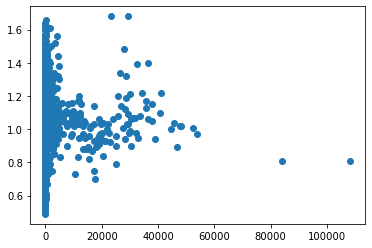

In [24]:
plt.scatter(df['XLarge Bags'],df['AveragePrice'])
plt.show()

### Observations:
        Average price of a Avocado in 'XLarge Bag' is 0.8 to 1.4 US Dollar.

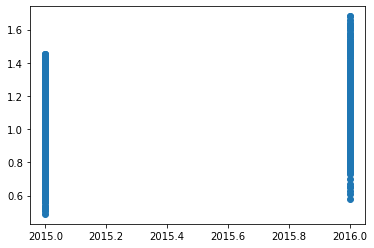

In [25]:
plt.scatter(df['year'],df['AveragePrice'])
plt.show()

### Observations:
    Average price of a Avocado has been increased by 0.4 Dollar for the year 2016 from 2015.

In [26]:
city=df.groupby('region')['AveragePrice'].mean().reset_index()
city

,region,AveragePrice
0,Albany,1.238657
1,Atlanta,1.012037
2,BaltimoreWashington,1.160923
3,Boise,0.974923
4,Boston,1.205484
5,BuffaloRochester,1.301569
6,California,1.055921
7,Charlotte,1.311613
8,Chicago,1.214783
9,Columbus,1.012553


In [27]:
city.sort_values('AveragePrice',ascending=False)[0:5]

,region,AveragePrice
46,Syracuse,1.347368
7,Charlotte,1.311613
5,BuffaloRochester,1.301569
30,Philadelphia,1.293846
45,StLouis,1.260000


### Observations:
    5 regions in US where average price of a Avocado is higher.

In [28]:
city.sort_values('AveragePrice')[0:5]

,region,AveragePrice
31,PhoenixTucson,0.659808
10,DallasFtWorth,0.755882
50,WestTexNewMexico,0.757407
17,Houston,0.780690
42,SouthCentral,0.818718


### Observations: 
    5 regions in US where average price of a Avocado is lower.

### 2. Target Variable = Region

In [29]:
tot_vol=df.groupby('region')['Total Volume'].mean().reset_index()

In [30]:
tot_vol.sort_values('Total Volume',ascending=False)[0:5]

,region,Total Volume
48,TotalUS,3.293714e+07
6,California,6.035277e+06
49,West,5.574939e+06
42,SouthCentral,5.496995e+06
27,Northeast,3.465864e+06


### Observations:
        On average, California and West regions buy more Avocados.

In [31]:
plu4046=df.groupby('region')['4046'].mean().reset_index()
plu4046.sort_values('4046',ascending=False)[0:5]

,region,4046
48,TotalUS,1.422580e+07
42,SouthCentral,3.077958e+06
6,California,2.410017e+06
49,West,2.348945e+06
43,Southeast,2.195695e+06


### Observations:
        On average, 'Avocados with PLU 4046' are sold more in SouthCentral, California regions.

In [32]:
plu4225=df.groupby('region')['4225'].mean().reset_index()
plu4225.sort_values('4225',ascending=False)[0:5]

,region,4225
48,TotalUS,1.243888e+07
27,Northeast,2.427952e+06
49,West,2.040127e+06
6,California,1.984823e+06
14,GreatLakes,1.720079e+06


### Observations:
        On average, 'Avocados with PLU 4225' are sold more in Northeast, West regions.

In [33]:
plu4770=df.groupby('region')['4770'].mean().reset_index()
plu4770.sort_values('4770',ascending=False)[0:5]

,region,4770
48,TotalUS,950091.078000
14,GreatLakes,300844.177222
6,California,225314.512500
24,Midsouth,188945.888889
49,West,124529.191111


### Observations:
        On average, 'Avocados with PLU 4770' are sold more in GreatLakes, California.

In [34]:
sb=df.groupby('region')['Small Bags'].mean().reset_index()
sb.sort_values('Small Bags',ascending=False)[0:5]

,region,Small Bags
48,TotalUS,4.519090e+06
6,California,1.286774e+06
27,Northeast,8.325909e+05
49,West,7.447474e+05
14,GreatLakes,5.701240e+05


### Observations:
    On average, people from California and Northeast regions buy more 'Small Bags' of Avocados.

In [35]:
lb=df.groupby('region')['Large Bags'].mean().reset_index()
lb.sort_values('Large Bags',ascending=False)[0:5]   

,region,Large Bags
48,TotalUS,779546.107600
49,West,315172.970278
43,Southeast,236389.612222
42,SouthCentral,123663.470256
6,California,109555.190526


### Observations:
    On average, people from California and Northeast regions buy more 'Large Bags' of Avocados.

In [36]:
xlb=df.groupby('region')['XLarge Bags'].mean().reset_index()
xlb.sort_values('XLarge Bags',ascending=False)[0:5]

,region,XLarge Bags
48,TotalUS,23732.280400
6,California,18792.960132
14,GreatLakes,16891.117778
12,Detroit,9337.904250
42,SouthCentral,5132.639487


### Observations:
    On average, people from California and GreatLakes regions buy more 'XLarge Bags' of Avocados.

## Correleation Matrix

In [37]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


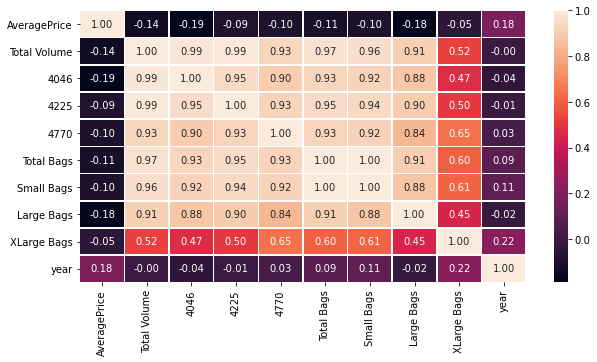

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidth=0.5)
plt.show()

### Observations:
    None of the columns have significant correlation with the target column.

# Data Preprocessing

## Checking Outliers

In [39]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


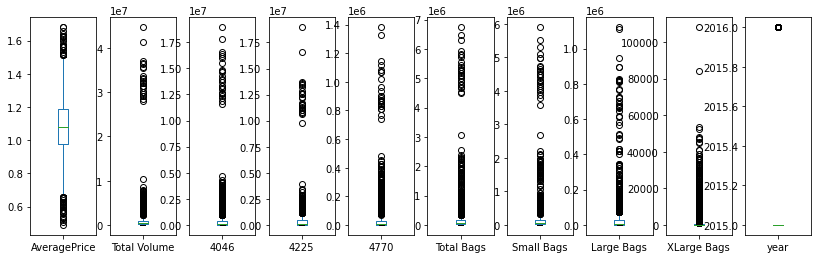

In [40]:
df.plot(kind='box',subplots=True,figsize=(14,4))
plt.show()

### Observations:
    From above boxplots it is clear that outliers exists.

In [41]:
df.drop('Date',axis=1,inplace=True)

### Since 'Date' column is not necessary for 'Average Price' and 'Region' prediction, we can drop this column.

## Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])

In [43]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015.0,0


## Removing Outliers

### 1. Z-score Method

In [44]:
from scipy.stats import zscore

z=np.abs(zscore(df))

In [45]:
np.where(z>3)

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
        1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
        1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
        1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
        1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
        1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
        1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
        1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
        1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
        1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
        1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
        1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
        1200, 1200, 1200, 1200, 1200, 

In [46]:
# Threshold=3
ad = df[(z<3).all(axis=1)]

In [47]:
print(df.shape)
print(ad.shape)

(1517, 12)
(0, 12)


    Since it removed all data we are not going with Z-score method of removing outliers.

## Checking Skewness

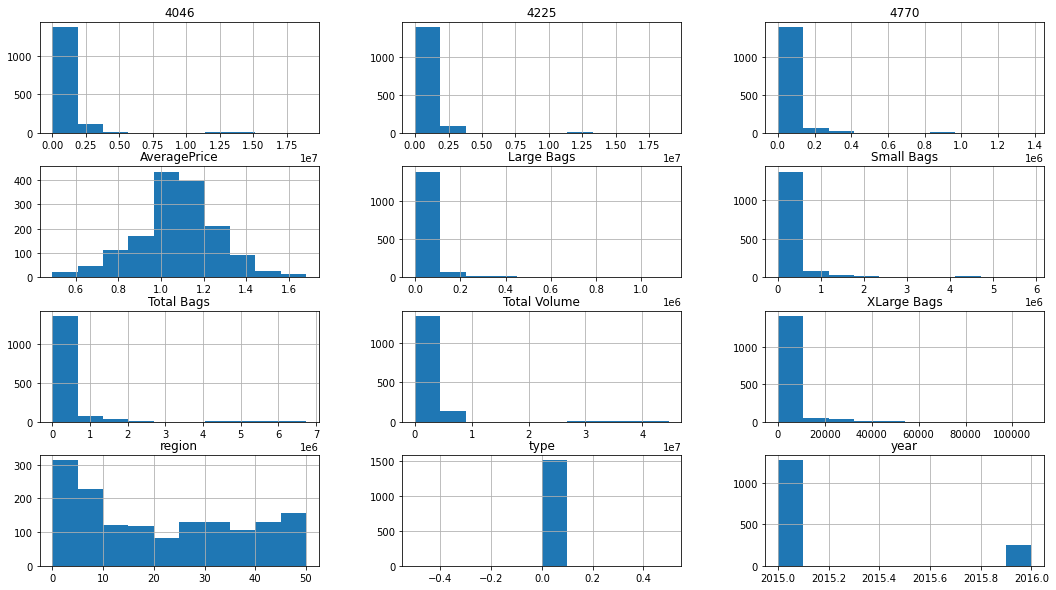

In [48]:
df.hist(figsize=(18,10))
plt.show()

### Observations:    
    From above plots it is clear that skewness exists.

In [49]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

### Observations:    
    Acceptable range of skewness is +\- 0.5, hence data is skewed.

## Splitting Data

In [50]:
regres=df.copy()
classi=df.copy()

### For Regression

In [51]:
x=regres.drop('AveragePrice',axis=1)
y=regres['AveragePrice']

In [52]:
x.shape

(1517, 11)

In [53]:
y.shape

(1517,)

### For Classification

In [54]:
x1=classi.drop('region',axis=1)
y1=classi['region']

In [55]:
x1.shape

(1517, 11)

In [56]:
y1.shape

(1517,)

## Removing Skewness

In [57]:
from sklearn.preprocessing import power_transform

x=power_transform(x)
x1=power_transform(x1)

## Standardizing Data

In [58]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)
x1=sc.fit_transform(x1)

# Model Training And Testing

# 1. Regression

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [60]:
# finding the best random_state

s=0
for i in range(40,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    mod_acc=r2_score(y_test,y_pred)
    if mod_acc>s:
        s=mod_acc
        best_random_state=i
        
print(f" Best r2_score is {s*100} which is found on random_state {best_random_state}")

 Best r2_score is 41.73950839903166 which is found on random_state 151


In [61]:
# finding the best cv

cv=0
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i).mean()
    if cv_score>cv:
        cv=cv_score
        best_cv=i
        
print(f" Best Cross_val_score is {cv*100} which is found on cv = {best_cv}")        

 Best Cross_val_score is 10.617539627249277 which is found on cv = 3


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=best_random_state)

# Finding The Best Model

In [63]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
mod_list=[Lasso(),Ridge(),ElasticNet(),GammaRegressor(),SGDRegressor(),DecisionTreeRegressor(),
         SVR(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

In [65]:
for i in mod_list:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    mod_acc=r2_score(y_test,y_pred)
    print('r2_score:',mod_acc*100)
    cv_score=cross_val_score(i,x,y,cv=best_cv).mean()
    print('cross_val_score:',cv_score*100)
    print('Difference b\w r2_score & cross_val_score is:',(mod_acc*100)-(cv_score*100))
    print('Training score:',i.score(x_train,y_train)*100)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
    print('Mean squared error:',mean_squared_error(y_test,y_pred))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

Lasso()
r2_score: -0.16222752322909706
cross_val_score: -0.8796381756158933
Difference b\w r2_score & cross_val_score is: 0.7174106523867962
Training score: 0.0
Error:
Mean absolute error: 0.14750796185714946
Mean squared error: 0.03596537797366086
Root mean squared error: 0.1896454006129884


Ridge()
r2_score: 41.544250756674664
cross_val_score: 12.034130771955788
Difference b\w r2_score & cross_val_score is: 29.510119984718877
Training score: 29.970031623327753
Error:
Mean absolute error: 0.11363476900987858
Mean squared error: 0.020989779962532904
Root mean squared error: 0.1448785006912099


ElasticNet()
r2_score: -0.16222752322909706
cross_val_score: -0.8796381756158933
Difference b\w r2_score & cross_val_score is: 0.7174106523867962
Training score: 0.0
Error:
Mean absolute error: 0.14750796185714946
Mean squared error: 0.03596537797366086
Root mean squared error: 0.1896454006129884


GammaRegressor()
r2_score: 25.254876832956818
cross_val_score: 14.983307583558581
Difference b\w 

### Observations:    
    From above it is clear that Random Forest Regressor is performing better, with r2_score of 80%-85%.   

### Let's perform hyper-parameter tuning on Random Forest Regressor model.

In [66]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
mod_acc=r2_score(y_test,y_pred)
print('r2_score:',mod_acc*100)
cv_score=cross_val_score(rfr,x,y,cv=best_cv).mean()
print('cross_val_score:',cv_score*100)
print('Difference b\w r2_score & cross_val_score is:',(mod_acc*100)-(cv_score*100))
print('Training score:',rfr.score(x_train,y_train)*100)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')

r2_score: 84.6684964178613
cross_val_score: -3.0270720507522846
Difference b\w r2_score & cross_val_score is: 87.69556846861359
Training score: 96.9794512071715
Error:
Mean absolute error: 0.055922105263157905
Mean squared error: 0.005505102421052638
Root mean squared error: 0.07419637741192381




## Hyper-parameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

parameters={
    'n_estimators':[100,150],
    'criterion':['mse','mae'],
    'max_features':['auto','sqrt','log2']
}

In [68]:
gscv=GridSearchCV(rfr,parameters,scoring='r2',cv=best_cv)
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150]},
             scoring='r2')

In [69]:
gscv.best_params_

{'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 150}

In [70]:
rfr_gs=RandomForestRegressor(n_estimators=150,criterion='mse',max_features='sqrt')
rfr_gs.fit(x_train,y_train)
y_pred=rfr_gs.predict(x_test)
mod_acc=r2_score(y_test,y_pred)
print('r2_score:',mod_acc*100)
cv_score=cross_val_score(rfr_gs,x,y,cv=best_cv).mean()
print('cross_val_score:',cv_score*100)
print('Difference b\w r2_score & cross_val_score is:',(mod_acc*100)-(cv_score*100))
print('Training score:',rfr_gs.score(x_train,y_train)*100)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 85.09189637790712
cross_val_score: 16.41119571863927
Difference b\w r2_score & cross_val_score is: 68.68070065926784
Training score: 97.26387726939011
Error:
Mean absolute error: 0.056031052631578905
Mean squared error: 0.005353071660818707
Root mean squared error: 0.07316468861970717


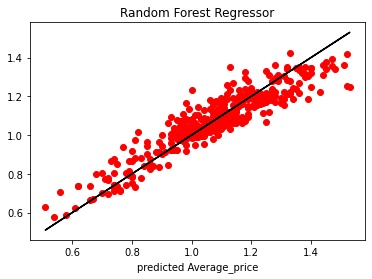

In [71]:
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_test,color='k')
plt.xlabel('Actual Average_price')
plt.xlabel('predicted Average_price')
plt.title('Random Forest Regressor')
plt.show()

## Conclusion

In [72]:
df1=pd.DataFrame({'Actual Average_price':y_test,'Predicted Average_price':y_pred})
df1

,Actual Average_price,Predicted Average_price
414,1.15,1.125467
197,0.98,1.032867
70,1.12,1.107600
1130,1.40,1.345400
698,1.17,1.161533
...,...,...
833,1.43,1.221600
175,1.35,1.347867
1163,1.10,1.043733
716,1.23,1.160600


### From above table it is clear that model is performing better.

In [73]:
import joblib

In [74]:
joblib.dump(y_pred,'Average-Price Predicted.csv')

['Average-Price Predicted.csv']

In [75]:
joblib.dump(rfr_gs,'Avocado-Average-Price Model.obj')

['Avocado-Average-Price Model.obj']

# 2. Classification

In [76]:
x1.shape

(1517, 11)

In [77]:
y1.shape

(1517,)

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
# finding the best random_state

acc=0
for i in range(40,800):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.25,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    if mod_acc>acc:
        acc=mod_acc
        best_random_state=i
        
print(f" Best Accuracy score is {acc*100} which is found on random_state {best_random_state}")

 Best Accuracy score is 93.42105263157895 which is found on random_state 744


In [80]:
# finding the best cv

cv=0
for i in range(2,10):
    cv_score=cross_val_score(dtc,x1,y1,cv=i).mean()
    if cv_score>cv:
        cv=cv_score
        best_cv=i
        
print(f" Best Cross_val_score is {cv*100} which is found on cv = {best_cv}")        

 Best Cross_val_score is 84.57532720690615 which is found on cv = 8


# Finding The Best Model

In [81]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
mod_list1=[DecisionTreeClassifier(),SGDClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier(),
           AdaBoostClassifier(),GradientBoostingClassifier()]

In [83]:
for i in mod_list1:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    print('Accuracy score:',mod_acc*100)
    cv_score=cross_val_score(i,x1,y1,cv=best_cv).mean()
    print('Cross_val_score:',cv_score*100)
    print('Difference b\w Accuracy score & Cross_val_score is:',(mod_acc*100)-(cv_score*100))
    print('Training score:',i.score(x_train,y_train)*100)
    print(confusion_matrix(y_test,y_pred))
#     print(classification_report(y_test,y_pred))
    print('\n')

DecisionTreeClassifier()
Accuracy score: 87.89473684210526
Cross_val_score: 83.12238930659983
Difference b\w Accuracy score & Cross_val_score is: 4.772347535505432
Training score: 100.0
[[13  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  4]]


SGDClassifier()
Accuracy score: 67.10526315789474
Cross_val_score: 65.39404065719856
Difference b\w Accuracy score & Cross_val_score is: 1.7112225006961808
Training score: 71.67985927880387
[[13  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  5]]


SVC()
Accuracy score: 88.1578947368421
Cross_val_score: 89.78070175438597
Difference b\w Accuracy score & Cross_val_score is: -1.6228070175438774
Training score: 91.90853122251539
[[13  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  3  0

### Observations:
        From above it is clear that Random Forest Classifier is performing better, with accuracy score of 94%-96%.         

### Let's perform hyper-parameter tuning on Random Forest Classifier model.

In [84]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
cv_score=cross_val_score(rfc,x1,y1,cv=best_cv).mean()
print('Cross_val_score:',cv_score*100)
print('Difference b\w Accuracy score & Cross_val_score is:',(mod_acc*100)-(cv_score*100))
print('Training score:',rfc.score(x_train,y_train)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 96.05263157894737
Cross_val_score: 94.92376775271512
Difference b\w Accuracy score & Cross_val_score is: 1.128863826232248
Training score: 100.0
[[13  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.88      1.00      0.94        15
           2       0.96      1.00      0.98        22
           3       1.00      1.00      1.00        15
           4       0.92      0.92      0.92        12
           5       0.89      0.89      0.89         9
           6       1.00      1.00      1.00        20
           7       0.92      1.00      0.96        12
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00         4
          11       1.00      1.00 

## Hyper-parameter Tuning

In [85]:
para={
    'n_estimators':[100,150],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
#     'class_weight':['balanced','balanced_subsample']
    }

In [86]:
gscv1=GridSearchCV(rfc,para,scoring='accuracy',cv=best_cv)
gscv1.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150]},
             scoring='accuracy')

In [87]:
gscv1.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}

In [88]:
rfc_gs=RandomForestClassifier(n_estimators=150,criterion='gini',max_features='sqrt')
rfc_gs.fit(x_train,y_train)
y_pred=rfc_gs.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
cv_score=cross_val_score(rfc_gs,x1,y1,cv=best_cv).mean()
print('Cross_val_score:',cv_score*100)
print('Difference b\w Accuracy score & Cross_val_score is:',(mod_acc*100)-(cv_score*100))
print('Training score:',rfc.score(x_train,y_train)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 96.57894736842105
Cross_val_score: 94.19799498746868
Difference b\w Accuracy score & Cross_val_score is: 2.3809523809523796
Training score: 100.0
[[13  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  7]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.88      1.00      0.94        15
           2       0.96      1.00      0.98        22
           3       1.00      1.00      1.00        15
           4       0.92      0.92      0.92        12
           5       0.80      0.89      0.84         9
           6       1.00      1.00      1.00        20
           7       0.92      1.00      0.96        12
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00         4
          11       1.00      1.00

## Conclusion

In [89]:
df2=pd.DataFrame({'Region':y_test,'Predicted_Region':y_pred})
df2

,Region,Predicted_Region
1462,6,6
662,26,26
774,31,17
1308,2,2
791,31,31
...,...,...
534,20,20
238,8,8
821,32,32
676,26,26


### From above table it is clear that model is performing better with 92%-96% accuracy.

In [90]:
import joblib

In [91]:
joblib.dump(y_pred,'Region Predicted.csv')

['Region Predicted.csv']

In [92]:
# Saving the best model for production
joblib.dump(rfc_gs,'Avocado-Region Model.obj')

['Avocado-Region Model.obj']